In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

def prettyshow(grads, legend, save='image.pdf', ylabel='Gradient Norm'):
    plt.rcParams['figure.figsize'] = 12, 8
    
    plt.figure()
    xlen = len(grads[0])
    colors = ['green', 'red', 'blue', 'orange', 'purple', 'brown']
    markers = ['d', '^', 'o', '<', '*', 's']
    idx_set = np.arange(0, xlen, xlen//10)
    
    for i in range(len(grads)):
        plt.semilogy(0, grads[i][0], color=colors[i], marker=markers[i], markersize=8)
    
    for i in range(len(grads)):
        for idx in idx_set:
            plt.semilogy(idx, grads[i][idx], color=colors[i], marker=markers[i], markersize=15, linestyle='None')
    
    for i in range(len(grads)):
        plt.semilogy(np.arange(xlen), grads[i], linewidth=4, color=colors[i])
    
    # 设置图例为2行3列，并放置在右上角
    plt.legend(legend, prop={'size': 30, 'weight': 'bold'}, loc='upper left', 
               bbox_to_anchor=(0.03, 1), ncol=2)
    
    plt.xlabel('Comm. Rounds', fontsize=47, fontweight='bold')
    plt.ylabel(ylabel, fontsize=47, fontweight='bold')
    
    # 设置科学记数法格式
    ax = plt.gca()
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    formatter.set_powerlimits((3, 6))  # 当数值超过1e3或1e6时使用科学记数法
    ax.xaxis.set_major_formatter(formatter)
    
    # 自定义x_tick显示，将数值除以100
    def format_x_tick(x, pos):
        return f'{x*1.0:.0f}'
    
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_x_tick))
    
    # 调整刻度数量和间隔
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    
    # 设置刻度标签和偏移文本的字体
    plt.xticks(fontsize=35, fontweight='bold')
    plt.yticks(fontsize=35, fontweight='bold')
    ax.xaxis.get_offset_text().set_fontsize(25)  # 调整科学记数法指数字体大小
    ax.xaxis.get_offset_text().set_fontweight('bold')
    plt.title("Grid", fontsize=47, fontweight='bold')
    
    plt.grid(True)
    plt.subplots_adjust(left=0.21, bottom=0.15, right=0.75)  # 调整右侧边距以容纳图例
    plt.savefig(save, bbox_inches='tight')
    plt.show()

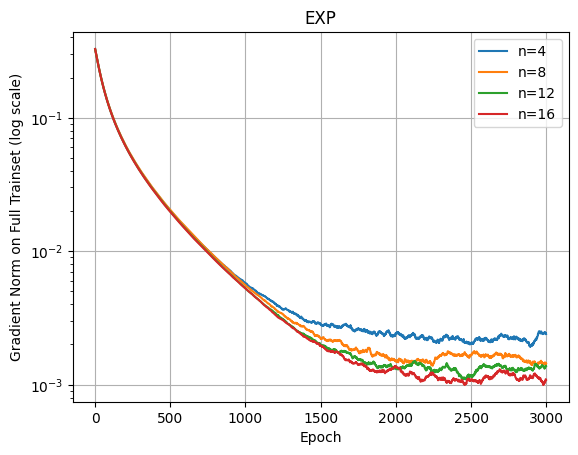

In [7]:
df1 = pd.read_csv('./EXP_out/EXP_avg_n=4_gpu_batched.csv')
df2 = pd.read_csv('./EXP_out/EXP_avg_n=8_gpu_batched.csv')
df3 = pd.read_csv('./EXP_out/EXP_avg_n=12_gpu_batched.csv')
df4 = pd.read_csv('./EXP_out/EXP_avg_n=16_gpu_batched.csv')

plt.plot(df1["gradient_norm_on_full_trainset_avg"], label='n=4')
plt.plot(df2["gradient_norm_on_full_trainset_avg"], label='n=8')
plt.plot(df3["gradient_norm_on_full_trainset_avg"], label='n=12')
plt.plot(df4["gradient_norm_on_full_trainset_avg"], label='n=16')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Gradient Norm on Full Trainset (log scale)')
plt.title('EXP')
plt.legend()
plt.grid(True)
plt.show()

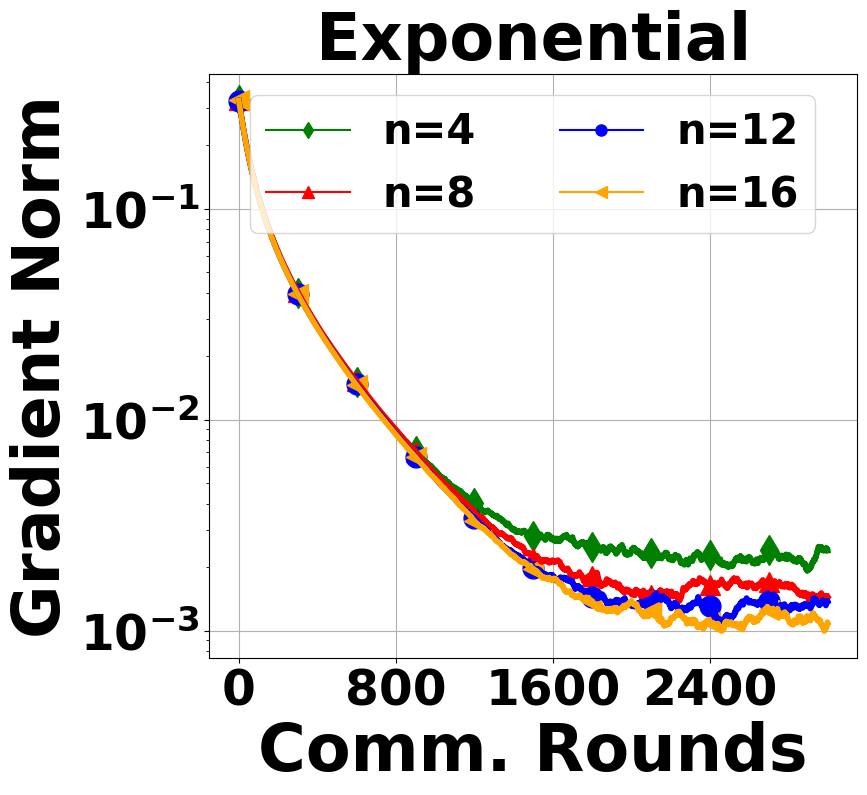

In [8]:
df1 = pd.read_csv('./EXP_out/EXP_avg_n=4_gpu_batched.csv')
df2 = pd.read_csv('./EXP_out/EXP_avg_n=8_gpu_batched.csv')
df3 = pd.read_csv('./EXP_out/EXP_avg_n=12_gpu_batched.csv')
df4 = pd.read_csv('./EXP_out/EXP_avg_n=16_gpu_batched.csv')

s=5000

grads = [
    df1["gradient_norm_on_full_trainset_avg"][:s],
    df2["gradient_norm_on_full_trainset_avg"][:s],
    df3["gradient_norm_on_full_trainset_avg"][:s],
    df4["gradient_norm_on_full_trainset_avg"][:s],
]
legend = [
    "n=4",
    "n=8",
    "n=12",
    "n=16",
]

prettyshow(grads, legend, save="/home/lg/ICML2025_project/push_pull_linear/PDF/exp_syn.pdf", ylabel="Gradient Norm")

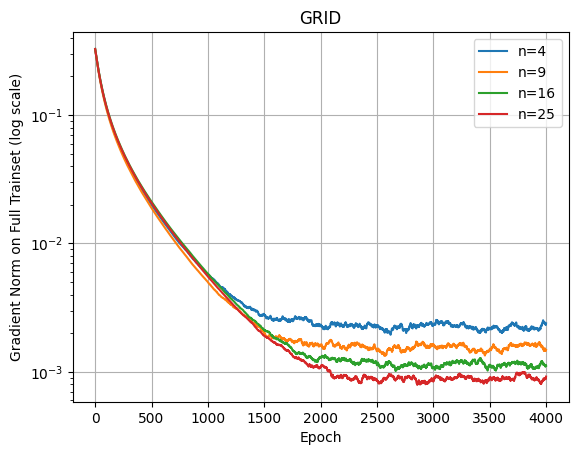

In [9]:
df1 = pd.read_csv('./GRID_out/GRID_avg_n=4_gpu_batched.csv')
df2 = pd.read_csv('./GRID_out/GRID_avg_n=9_gpu_batched.csv')
df3 = pd.read_csv('./GRID_out/GRID_avg_n=16_gpu_batched.csv')
df4 = pd.read_csv('./GRID_out/GRID_avg_n=25_gpu_batched.csv')

plt.plot(df1["gradient_norm_on_full_trainset_avg"], label='n=4')
plt.plot(df2["gradient_norm_on_full_trainset_avg"], label='n=9')
plt.plot(df3["gradient_norm_on_full_trainset_avg"], label='n=16')
plt.plot(df4["gradient_norm_on_full_trainset_avg"], label='n=25')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Gradient Norm on Full Trainset (log scale)')
plt.title('GRID')
plt.legend()
plt.grid(True)
plt.show()

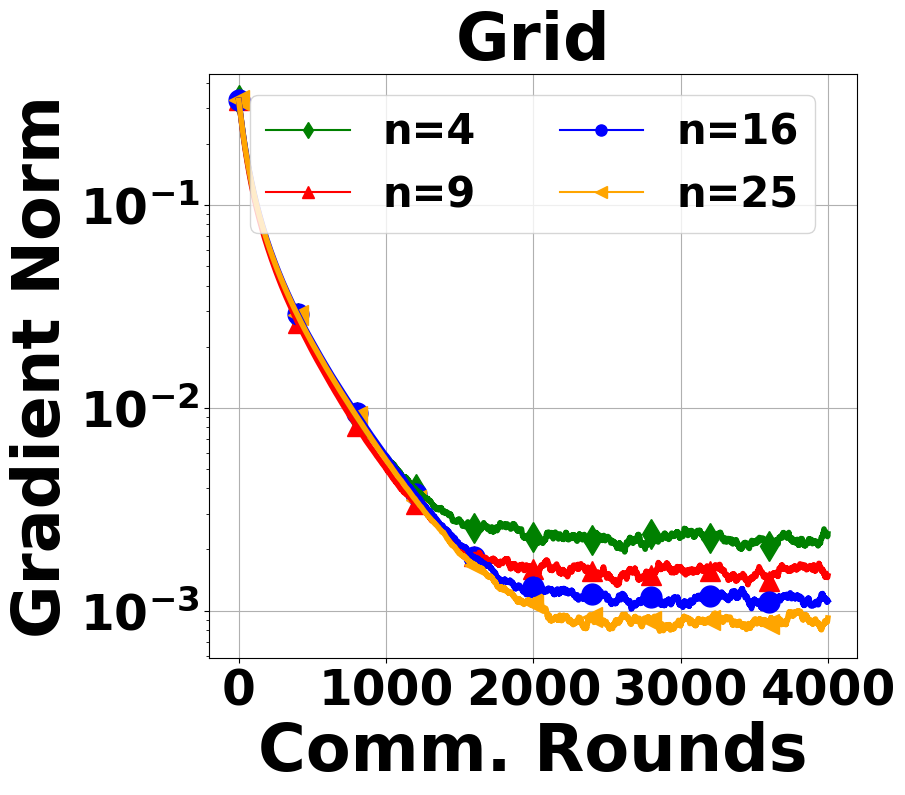

In [14]:
df1 = pd.read_csv('./GRID_out/GRID_avg_n=4_gpu_batched.csv')
df2 = pd.read_csv('./GRID_out/GRID_avg_n=9_gpu_batched.csv')
df3 = pd.read_csv('./GRID_out/GRID_avg_n=16_gpu_batched.csv')
df4 = pd.read_csv('./GRID_out/GRID_avg_n=25_gpu_batched.csv')

s=5000

grads = [
    df1["gradient_norm_on_full_trainset_avg"][:s],
    df2["gradient_norm_on_full_trainset_avg"][:s],
    df3["gradient_norm_on_full_trainset_avg"][:s],
    df4["gradient_norm_on_full_trainset_avg"][:s],
]
legend = [
    "n=4",
    "n=9",
    "n=16",
    "n=25",
]

prettyshow(grads, legend, save="/home/lg/ICML2025_project/push_pull_linear/PDF/grid_syn.pdf", ylabel="Gradient Norm")

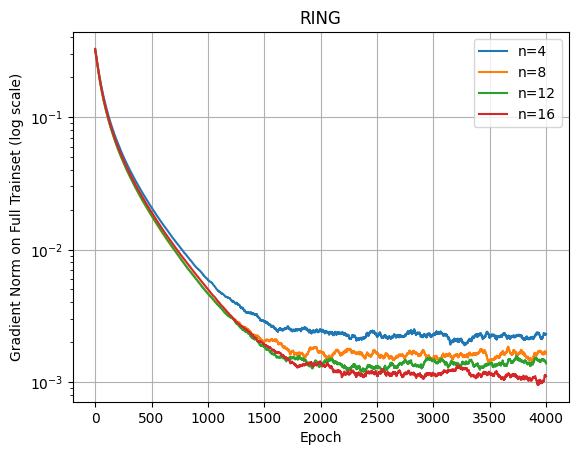

In [2]:
df1 = pd.read_csv('./RING_out/RING_avg_n=4_gpu_batched.csv')
df2 = pd.read_csv('./RING_out/RING_avg_n=8_gpu_batched.csv')
df3 = pd.read_csv('./RING_out/RING_avg_n=12_gpu_batched.csv')
df4 = pd.read_csv('./RING_out/RING_avg_n=16_gpu_batched.csv')

plt.plot(df1["gradient_norm_on_full_trainset_avg"], label='n=4')
plt.plot(df2["gradient_norm_on_full_trainset_avg"], label='n=8')
plt.plot(df3["gradient_norm_on_full_trainset_avg"], label='n=12')
plt.plot(df4["gradient_norm_on_full_trainset_avg"], label='n=16')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Gradient Norm on Full Trainset (log scale)')
plt.title('RING')
plt.legend()
plt.grid(True)
plt.show()

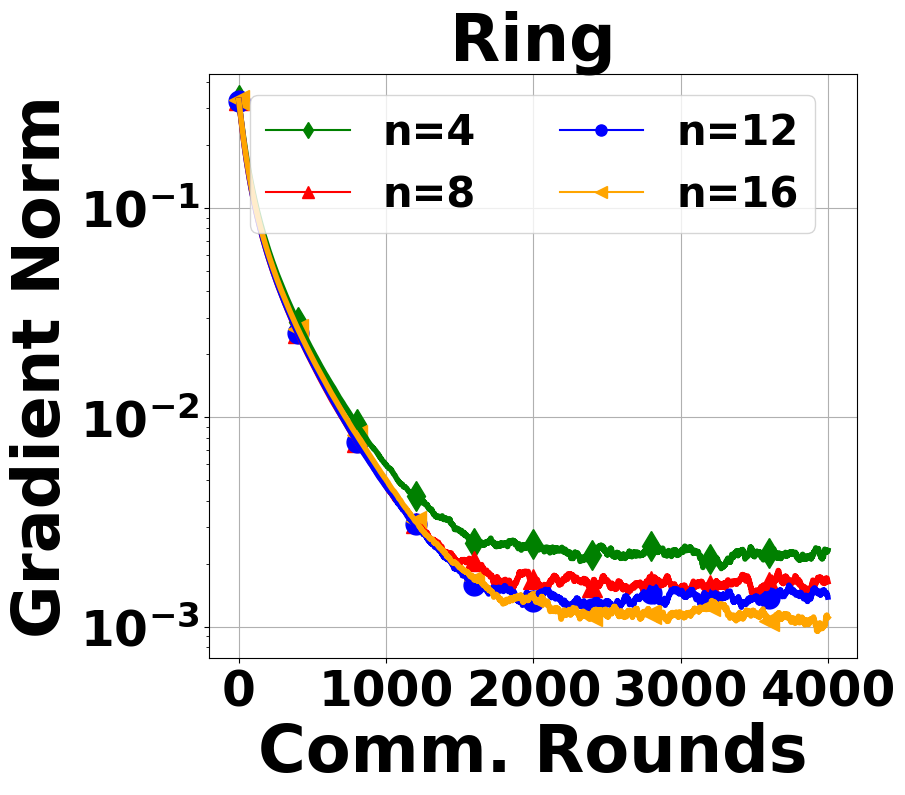

In [12]:
df1 = pd.read_csv('./RING_out/RING_avg_n=4_gpu_batched.csv')
df2 = pd.read_csv('./RING_out/RING_avg_n=8_gpu_batched.csv')
df3 = pd.read_csv('./RING_out/RING_avg_n=12_gpu_batched.csv')
df4 = pd.read_csv('./RING_out/RING_avg_n=16_gpu_batched.csv')

s=5000

grads = [
    df1["gradient_norm_on_full_trainset_avg"][:s],
    df2["gradient_norm_on_full_trainset_avg"][:s],
    df3["gradient_norm_on_full_trainset_avg"][:s],
    df4["gradient_norm_on_full_trainset_avg"][:s],
]
legend = [
    "n=4",
    "n=8",
    "n=12",
    "n=16",
]

prettyshow(grads, legend, save="/home/lg/ICML2025_project/push_pull_linear/PDF/ring_syn.pdf", ylabel="Gradient Norm")

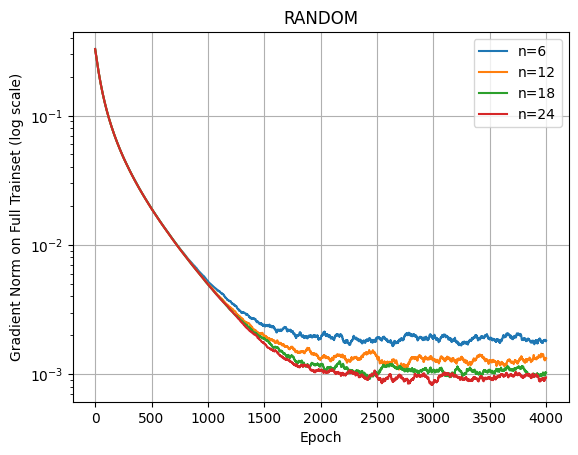

In [3]:
df1 = pd.read_csv('./RANDOM_out/RANDOM_avg_n=6_gpu_batched.csv')
df2 = pd.read_csv('./RANDOM_out/RANDOM_avg_n=12_gpu_batched.csv')
df3 = pd.read_csv('./RANDOM_out/RANDOM_avg_n=18_gpu_batched.csv')
df4 = pd.read_csv('./RANDOM_out/RANDOM_avg_n=24_gpu_batched.csv')

plt.plot(df1["gradient_norm_on_full_trainset_avg"], label='n=6')
plt.plot(df2["gradient_norm_on_full_trainset_avg"], label='n=12')
plt.plot(df3["gradient_norm_on_full_trainset_avg"], label='n=18')
plt.plot(df4["gradient_norm_on_full_trainset_avg"], label='n=24')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Gradient Norm on Full Trainset (log scale)')
plt.title('RANDOM')
plt.legend()
plt.grid(True)
plt.show()

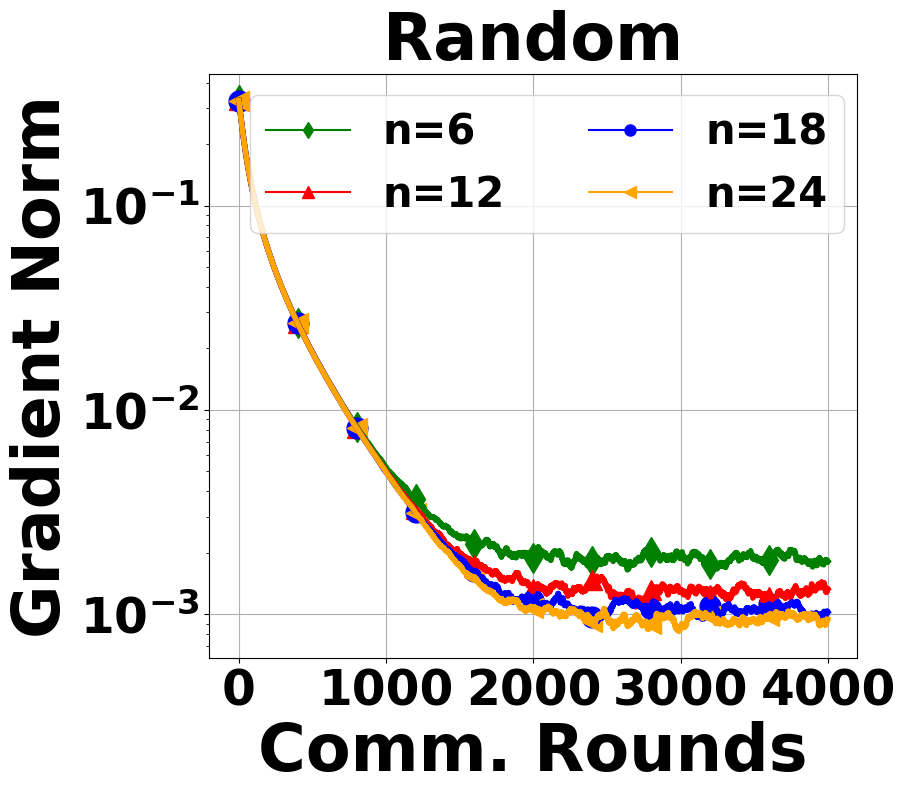

In [16]:
df1 = pd.read_csv('./RANDOM_out/RANDOM_avg_n=6_gpu_batched.csv')
df2 = pd.read_csv('./RANDOM_out/RANDOM_avg_n=12_gpu_batched.csv')
df3 = pd.read_csv('./RANDOM_out/RANDOM_avg_n=18_gpu_batched.csv')
df4 = pd.read_csv('./RANDOM_out/RANDOM_avg_n=24_gpu_batched.csv')

s=5000

grads = [
    df1["gradient_norm_on_full_trainset_avg"][:s],
    df2["gradient_norm_on_full_trainset_avg"][:s],
    df3["gradient_norm_on_full_trainset_avg"][:s],
    df4["gradient_norm_on_full_trainset_avg"][:s],
]
legend = [
    "n=6",
    "n=12",
    "n=18",
    "n=24",
]

prettyshow(grads, legend, save="/home/lg/ICML2025_project/push_pull_linear/PDF/random_syn.pdf", ylabel="Gradient Norm")

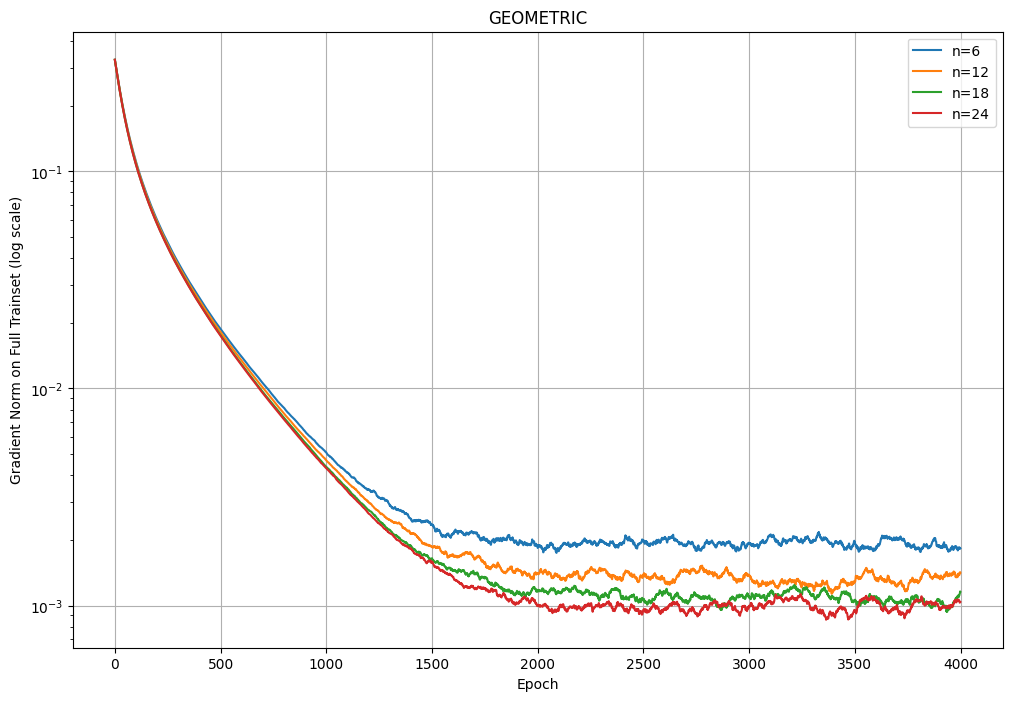

In [17]:
df1 = pd.read_csv('./GEOMETRIC_out/GEOMETRIC_avg_n=6_gpu_batched.csv')
df2 = pd.read_csv('./GEOMETRIC_out/GEOMETRIC_avg_n=12_gpu_batched.csv')
df3 = pd.read_csv('./GEOMETRIC_out/GEOMETRIC_avg_n=18_gpu_batched.csv')
df4 = pd.read_csv('./GEOMETRIC_out/GEOMETRIC_avg_n=24_gpu_batched.csv')

plt.plot(df1["gradient_norm_on_full_trainset_avg"], label='n=6')
plt.plot(df2["gradient_norm_on_full_trainset_avg"], label='n=12')
plt.plot(df3["gradient_norm_on_full_trainset_avg"], label='n=18')
plt.plot(df4["gradient_norm_on_full_trainset_avg"], label='n=24')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Gradient Norm on Full Trainset (log scale)')
plt.title('GEOMETRIC')
plt.legend()
plt.grid(True)
plt.show()

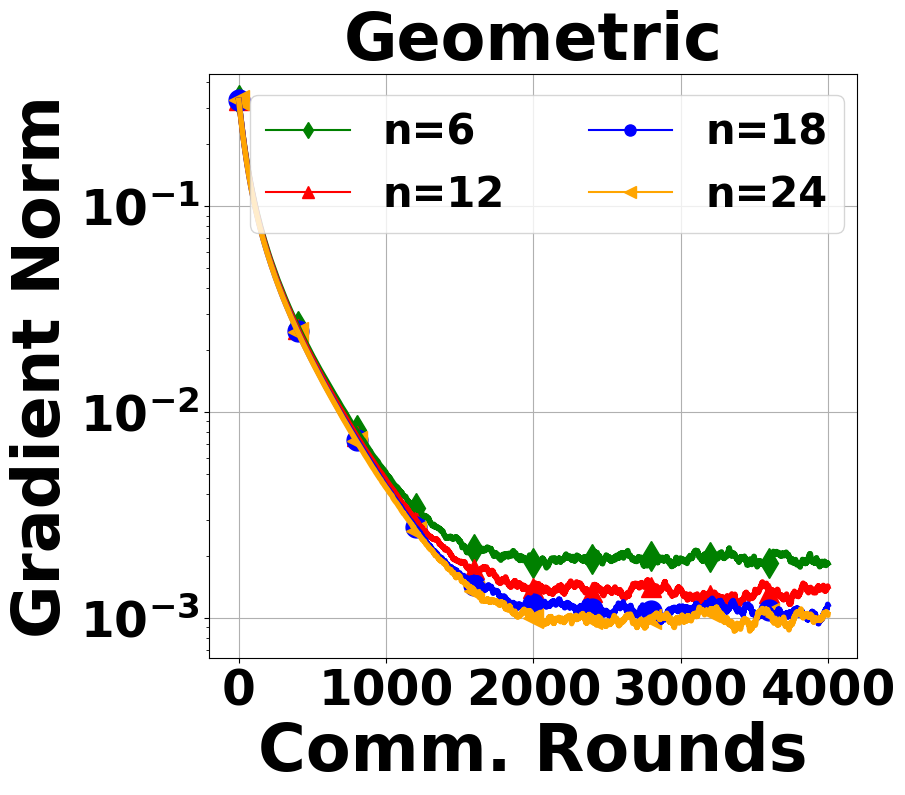

In [19]:
df1 = pd.read_csv('./GEOMETRIC_out/GEOMETRIC_avg_n=6_gpu_batched.csv')
df2 = pd.read_csv('./GEOMETRIC_out/GEOMETRIC_avg_n=12_gpu_batched.csv')
df3 = pd.read_csv('./GEOMETRIC_out/GEOMETRIC_avg_n=18_gpu_batched.csv')
df4 = pd.read_csv('./GEOMETRIC_out/GEOMETRIC_avg_n=24_gpu_batched.csv')

s=5000

grads = [
    df1["gradient_norm_on_full_trainset_avg"][:s],
    df2["gradient_norm_on_full_trainset_avg"][:s],
    df3["gradient_norm_on_full_trainset_avg"][:s],
    df4["gradient_norm_on_full_trainset_avg"][:s],
]
legend = [
    "n=6",
    "n=12",
    "n=18",
    "n=24",
]

prettyshow(grads, legend, save="/home/lg/ICML2025_project/push_pull_linear/PDF/geometric_syn.pdf", ylabel="Gradient Norm")

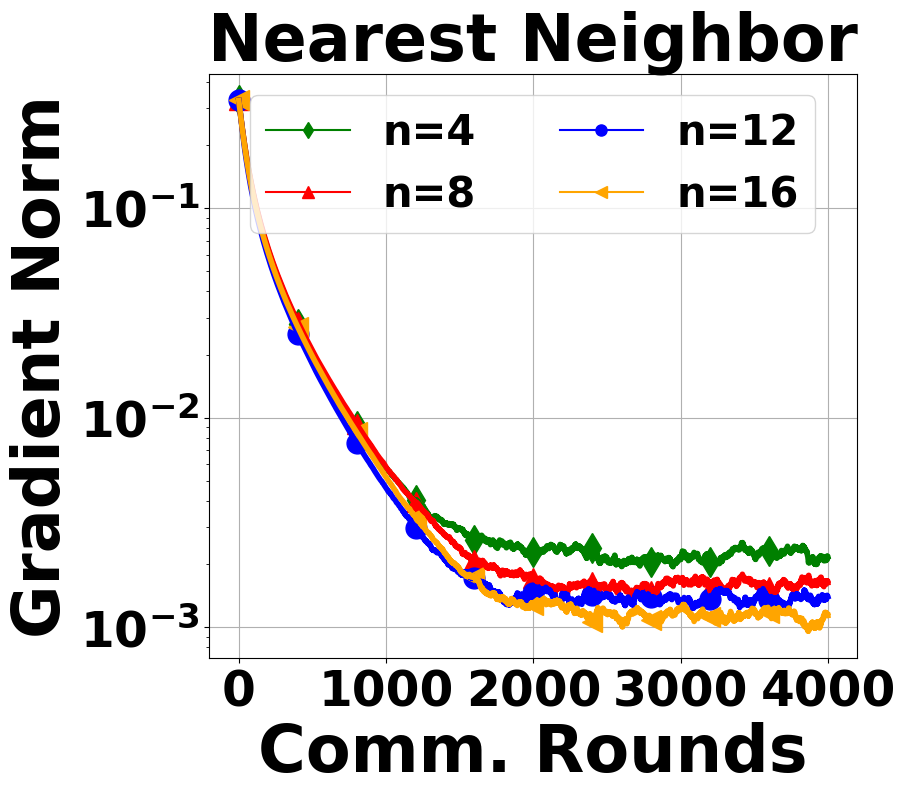

In [21]:
df1 = pd.read_csv('./neighbor_out/neighbor_avg_n=4_gpu_batched.csv')
df2 = pd.read_csv('./neighbor_out/neighbor_avg_n=8_gpu_batched.csv')
df3 = pd.read_csv('./neighbor_out/neighbor_avg_n=12_gpu_batched.csv')
df4 = pd.read_csv('./neighbor_out/neighbor_avg_n=16_gpu_batched.csv')

s=5000

grads = [
    df1["gradient_norm_on_full_trainset_avg"][:s],
    df2["gradient_norm_on_full_trainset_avg"][:s],
    df3["gradient_norm_on_full_trainset_avg"][:s],
    df4["gradient_norm_on_full_trainset_avg"][:s],
]
legend = [
    "n=4",
    "n=8",
    "n=12",
    "n=16",
]

prettyshow(grads, legend, save="/home/lg/ICML2025_project/push_pull_linear/PDF/neighbor_syn.pdf", ylabel="Gradient Norm")

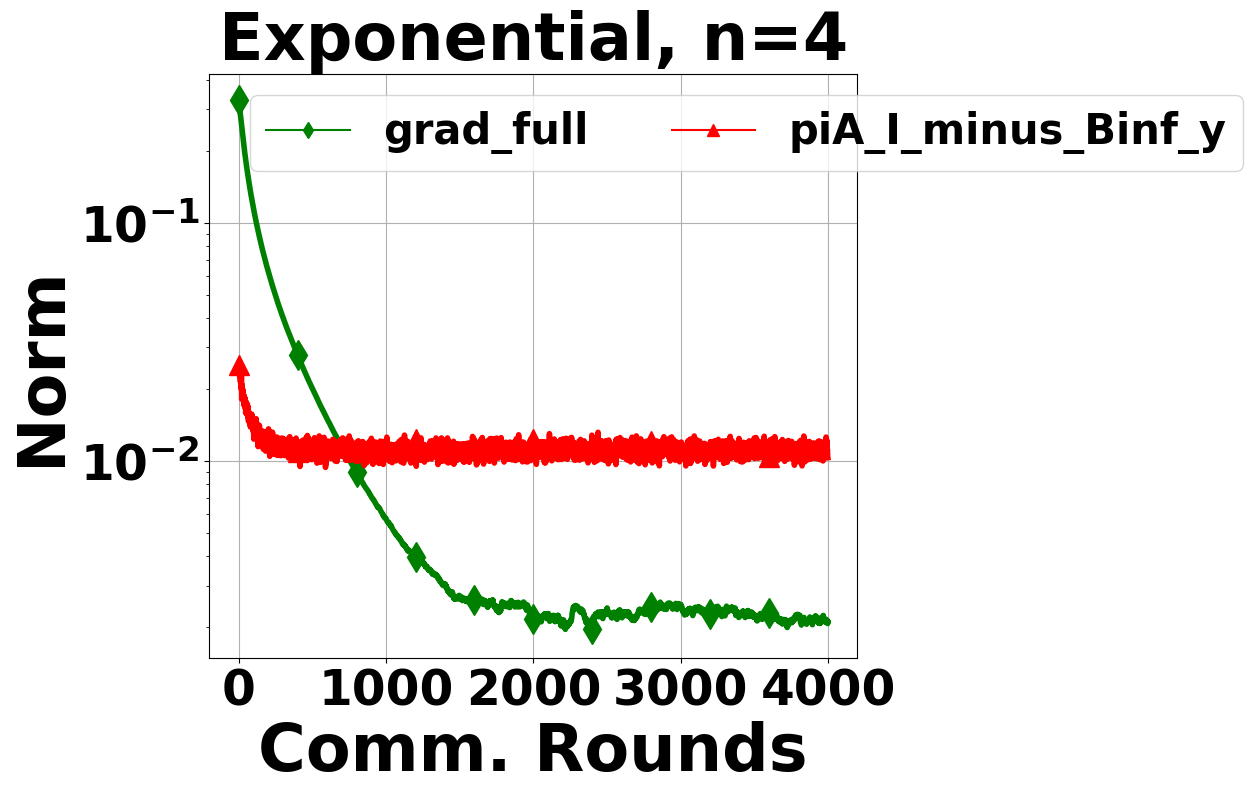

In [11]:
df1 = pd.read_csv("./EXP_out/new_new_EXP_avg_n=4_gpu_batched.csv")

s=5000

grads = [
    df1["gradient_norm_on_full_trainset_avg"][:s],
    df1["piA_I_minus_Binf_y_norm"][:s],
]
legend = [
    "grad_full",
    "piA_I_minus_Binf_y",
]

prettyshow(grads, legend, save="/home/lg/ICML2025_project/push_pull_linear/PDF/exp_n=4test.pdf", ylabel="Norm")

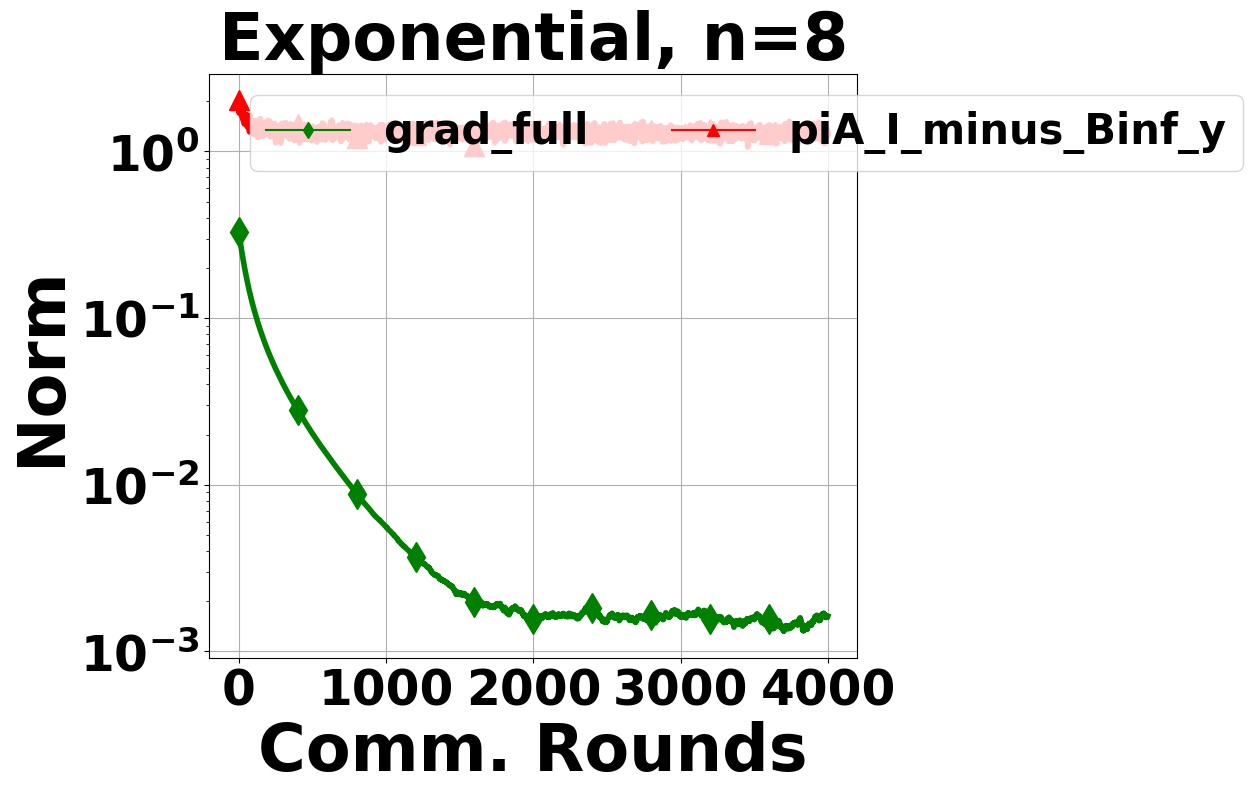

In [13]:
df1 = pd.read_csv("./EXP_out/new_new_EXP_avg_n=8_gpu_batched.csv")

s=5000

grads = [
    df1["gradient_norm_on_full_trainset_avg"][:s],
    df1["piA_I_minus_Binf_y_norm"][:s],
]
legend = [
    "grad_full",
    "piA_I_minus_Binf_y",
]

prettyshow(grads, legend, save="/home/lg/ICML2025_project/push_pull_linear/PDF/exp_n=8test.pdf", ylabel="Norm")

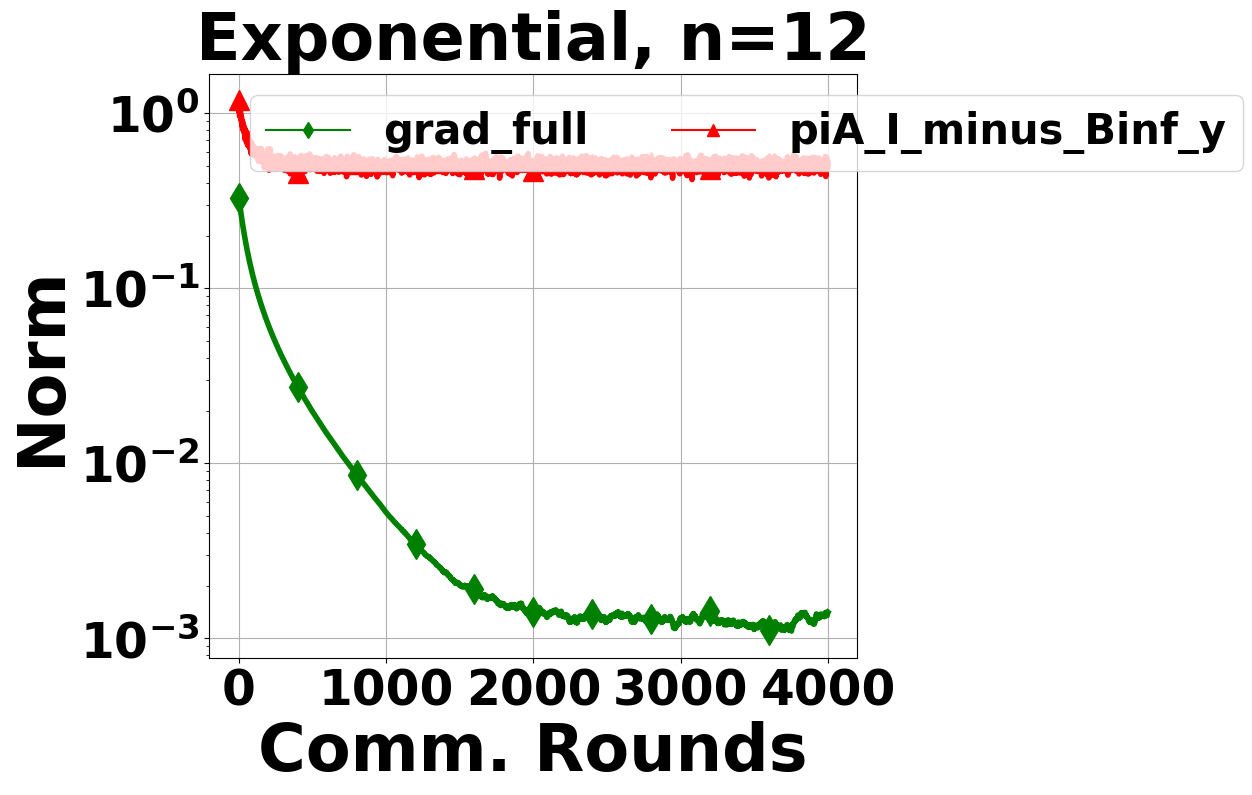

In [16]:
df1 = pd.read_csv("./EXP_out/new_new_EXP_avg_n=12_gpu_batched.csv")

s=5000

grads = [
    df1["gradient_norm_on_full_trainset_avg"][:s],
    df1["piA_I_minus_Binf_y_norm"][:s],
]
legend = [
    "grad_full",
    "piA_I_minus_Binf_y",
]

prettyshow(grads, legend, save="/home/lg/ICML2025_project/push_pull_linear/PDF/exp_n=12test.pdf", ylabel="Norm")

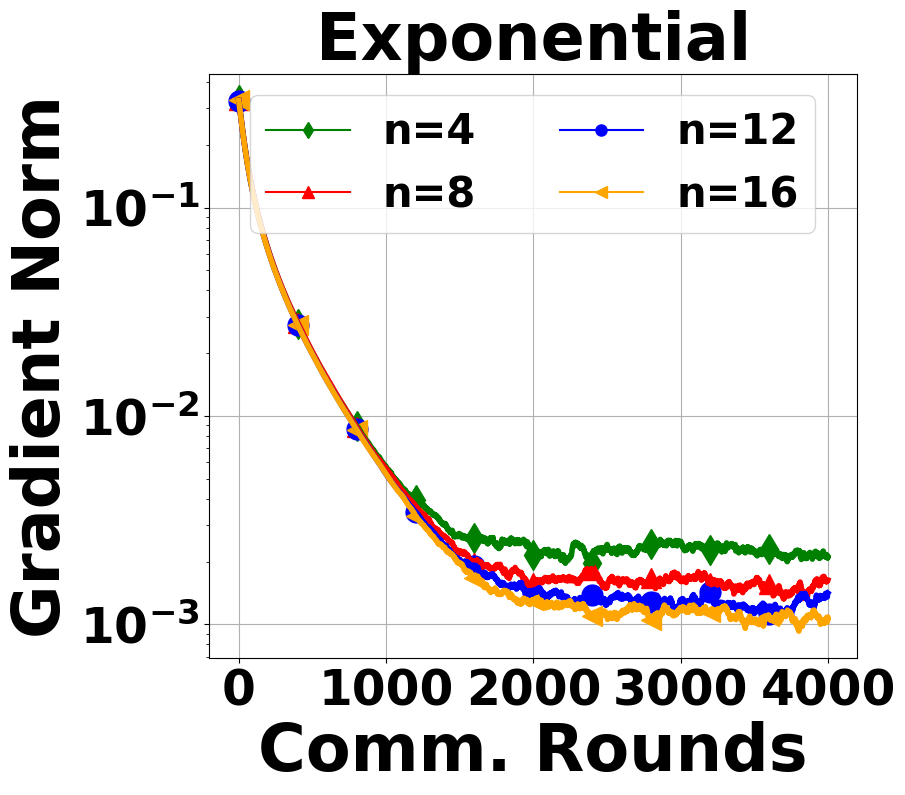

In [28]:
df1 = pd.read_csv("./EXP_out/new_new_EXP_avg_n=4_gpu_batched.csv")
df2 = pd.read_csv("./EXP_out/new_new_EXP_avg_n=8_gpu_batched.csv")
df3 = pd.read_csv("./EXP_out/new_new_EXP_avg_n=12_gpu_batched.csv")
df4 = pd.read_csv("./EXP_out/new_new_EXP_avg_n=16_gpu_batched.csv")

s=5000

grads = [
    df1["gradient_norm_on_full_trainset_avg"][:s],
    df2["gradient_norm_on_full_trainset_avg"][:s],
    df3["gradient_norm_on_full_trainset_avg"][:s],
    df4["gradient_norm_on_full_trainset_avg"][:s],
]
legend = [
    "n=4",
    "n=8",
    "n=12",
    "n=16",
]

prettyshow(grads, legend, save="/home/lg/ICML2025_project/push_pull_linear/PDF/exp_n=4_8_12_16test_gradnorm.pdf", ylabel="Gradient Norm")

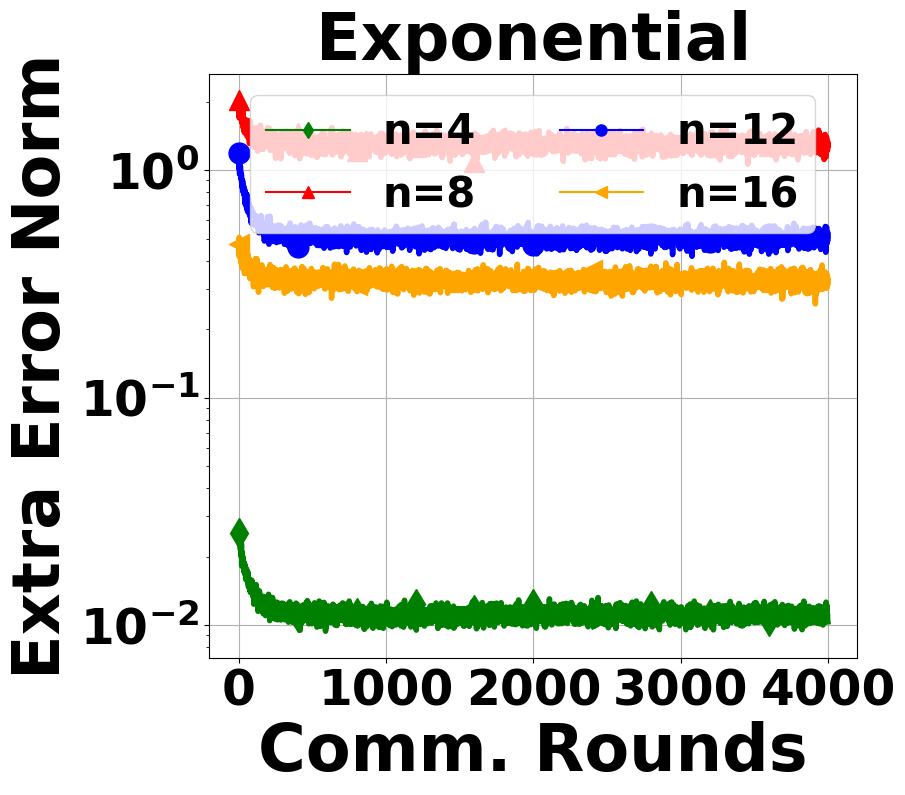

In [27]:
df1 = pd.read_csv("./EXP_out/new_new_EXP_avg_n=4_gpu_batched.csv")
df2 = pd.read_csv("./EXP_out/new_new_EXP_avg_n=8_gpu_batched.csv")
df3 = pd.read_csv("./EXP_out/new_new_EXP_avg_n=12_gpu_batched.csv")
df4 = pd.read_csv("./EXP_out/new_new_EXP_avg_n=16_gpu_batched.csv")

s=5000

grads = [
    df1["piA_I_minus_Binf_y_norm"][:s],
    df2["piA_I_minus_Binf_y_norm"][:s],
    df3["piA_I_minus_Binf_y_norm"][:s],
    df4["piA_I_minus_Binf_y_norm"][:s],
]
legend = [
    "n=4",
    "n=8",
    "n=12",
    "n=16",
]

prettyshow(grads, legend, save="/home/lg/ICML2025_project/push_pull_linear/PDF/exp_n=4_8_12_16test_error.pdf", ylabel="Extra Error Norm")

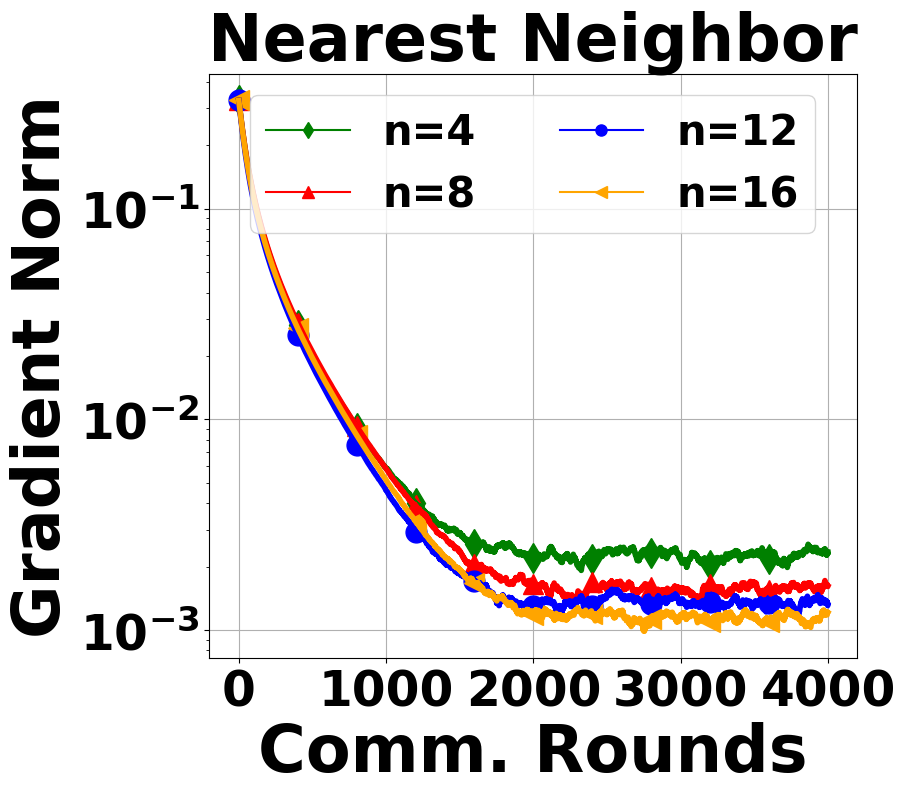

In [30]:
df1 = pd.read_csv("./NEW_out/neighbor_new_new_neighbor_avg_n=4_gpu_batched.csv")
df2 = pd.read_csv("./NEW_out/neighbor_new_new_neighbor_avg_n=8_gpu_batched.csv")
df3 = pd.read_csv("./NEW_out/neighbor_new_new_neighbor_avg_n=12_gpu_batched.csv")
df4 = pd.read_csv("./NEW_out/neighbor_new_new_neighbor_avg_n=16_gpu_batched.csv")

s=5000

grads = [
    df1["gradient_norm_on_full_trainset_avg"][:s],
    df2["gradient_norm_on_full_trainset_avg"][:s],
    df3["gradient_norm_on_full_trainset_avg"][:s],
    df4["gradient_norm_on_full_trainset_avg"][:s],
]
legend = [
    "n=4",
    "n=8",
    "n=12",
    "n=16",
]

prettyshow(grads, legend, save="/home/lg/ICML2025_project/push_pull_linear/PDF/neighbor_n=4_8_12_16test_gradnorm.pdf", ylabel="Gradient Norm")

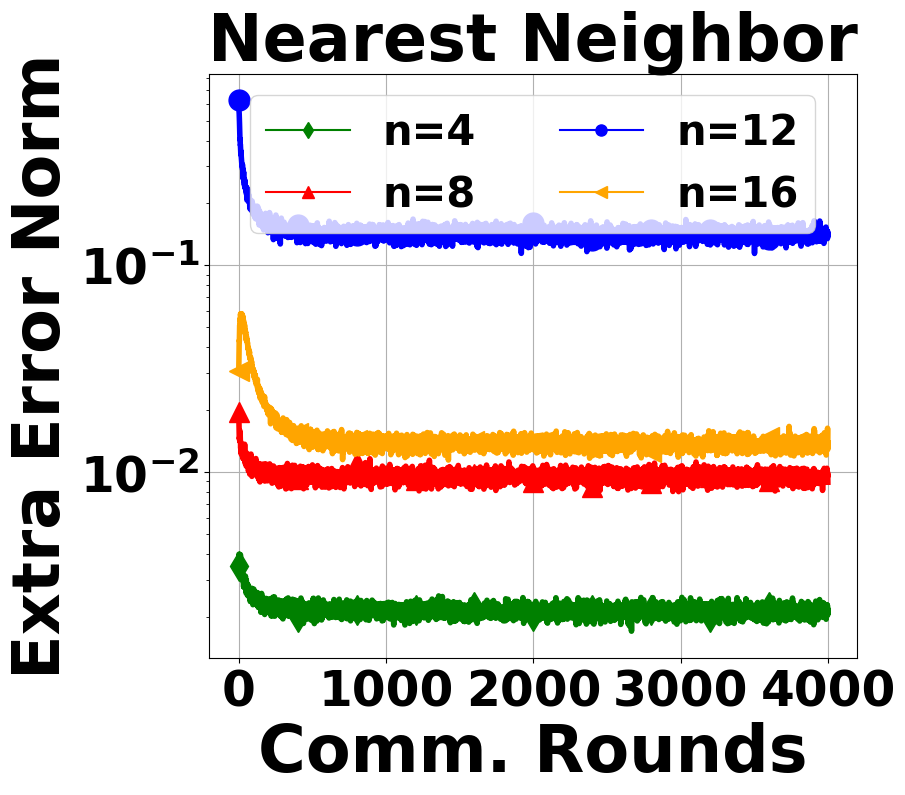

In [31]:
df1 = pd.read_csv("./NEW_out/neighbor_new_new_neighbor_avg_n=4_gpu_batched.csv")
df2 = pd.read_csv("./NEW_out/neighbor_new_new_neighbor_avg_n=8_gpu_batched.csv")
df3 = pd.read_csv("./NEW_out/neighbor_new_new_neighbor_avg_n=12_gpu_batched.csv")
df4 = pd.read_csv("./NEW_out/neighbor_new_new_neighbor_avg_n=16_gpu_batched.csv")

s=5000

grads = [
    df1["piA_I_minus_Binf_y_norm"][:s],
    df2["piA_I_minus_Binf_y_norm"][:s],
    df3["piA_I_minus_Binf_y_norm"][:s],
    df4["piA_I_minus_Binf_y_norm"][:s],
]
legend = [
    "n=4",
    "n=8",
    "n=12",
    "n=16",
]

prettyshow(grads, legend, save="/home/lg/ICML2025_project/push_pull_linear/PDF/neighbor_n=4_8_12_16test_error.pdf", ylabel="Extra Error Norm")

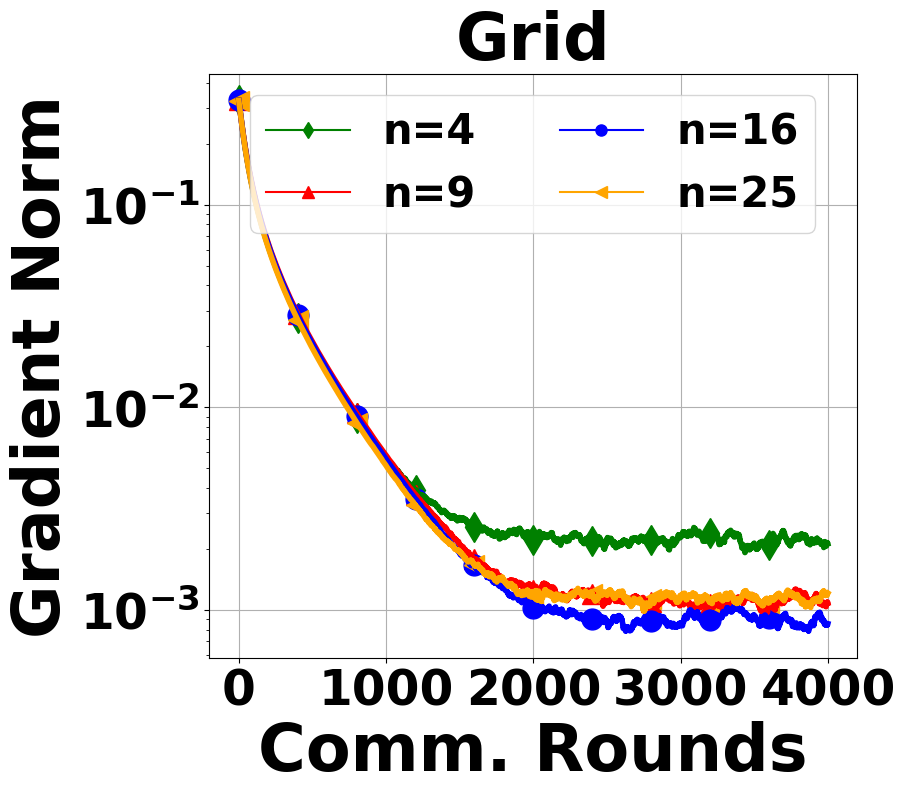

In [34]:
df1 = pd.read_csv("./NEW_out/GRID_new_new_GRID_avg_n=4_gpu_batched.csv")
df2 = pd.read_csv("./NEW_out/GRID_new_new_GRID_avg_n=9_gpu_batched.csv")
df2 = pd.read_csv("./NEW_out/GRID_new_new_GRID_avg_n=16_gpu_batched.csv")
df3 = pd.read_csv("./NEW_out/GRID_new_new_GRID_avg_n=25_gpu_batched.csv")

s=5000

grads = [
    df1["gradient_norm_on_full_trainset_avg"][:s],
    df2["gradient_norm_on_full_trainset_avg"][:s],
    df3["gradient_norm_on_full_trainset_avg"][:s],
    df4["gradient_norm_on_full_trainset_avg"][:s],
]
legend = [
    "n=4",
    "n=9",
    "n=16",
    "n=25",
]

prettyshow(grads, legend, save="/home/lg/ICML2025_project/push_pull_linear/PDF/grid_n=4_9_16_25test_gradnorm.pdf", ylabel="Gradient Norm")